In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dis

def get_literal_returns(func):
    rtn = []
    for instr in dis.Bytecode(func):
        if instr.opname == "RETURN_CONST":
            rtn.append(instr.argval)
        elif instr.opname == "RETURN_VALUE":
            rtn.append(instr.argrepr)

    return rtn

def example(a=True):
    if a == 2:
        return a

    if a:
        return 42
    else:
        return "hello"

get_literal_returns(example)  # Returns ['', 42, 'hello'], but I want it to return ['a', 42, 'hello']


['', 42, 'hello']

In [3]:
import dis

def get_literal_returns(func):
    rtn = []
    stack = []  # Tracks last loaded values

    for instr in dis.Bytecode(func):
        if instr.opname in {"LOAD_FAST", "LOAD_GLOBAL"}:  # Variable names
            stack.append(instr.argval)
        elif instr.opname == "LOAD_CONST":  # Literals
            stack.append(instr.argval)
        elif instr.opname == "RETURN_VALUE":
            if stack:  # Use last loaded value (var name or literal)
                rtn.append(stack[-1])
        elif instr.opname == "RETURN_CONST":
            rtn.append(instr.argval)

    return rtn

def example(a=True):
    if a == 2:
        return a  # Should capture 'a'

    if a:
        return 42  # Should capture 42
    else:
        return "hello"  # Should capture "hello"

get_literal_returns(example)  # Output: ['a', 42, 'hello']
# get_literal_returns(lambda: 8)  # Output: ['a', 42, 'hello']
get_literal_returns(lambda: 8)  # Output: ['a', 42, 'hello']


[8]

In [4]:
# print(dis.Bytecode(TestGraph().do_the_thing).dis())
from step_algorithm_v2 import StepsController


for i in list(dis.Bytecode(StepsController().screwdriver__labels)):
    print(i)
# print(dis.Bytecode(function).info())

Instruction(opname='RESUME', opcode=151, arg=0, argval=0, argrepr='', offset=0, starts_line=126, is_jump_target=False, positions=Positions(lineno=126, end_lineno=126, col_offset=0, end_col_offset=0))
Instruction(opname='LOAD_GLOBAL', opcode=116, arg=0, argval='case', argrepr='case', offset=2, starts_line=128, is_jump_target=False, positions=Positions(lineno=128, end_lineno=128, col_offset=11, end_col_offset=15))
Instruction(opname='LOAD_ATTR', opcode=106, arg=2, argval='serial', argrepr='serial', offset=12, starts_line=None, is_jump_target=False, positions=Positions(lineno=128, end_lineno=128, col_offset=11, end_col_offset=22))
Instruction(opname='LOAD_ATTR', opcode=106, arg=5, argval='startswith', argrepr='NULL|self + startswith', offset=32, starts_line=None, is_jump_target=False, positions=Positions(lineno=128, end_lineno=128, col_offset=11, end_col_offset=33))
Instruction(opname='LOAD_CONST', opcode=100, arg=1, argval='m6', argrepr="'m6'", offset=52, starts_line=None, is_jump_target

In [5]:
StepsController.get_returns(StepsController().confirm_ids)

['confirm_id', 'screwdriver__labels']

In [6]:
from GraphController import TestGraph

Before a
Before b
Deciding...
	self= <GraphController.TestGraph object at 0x7fab84550380>
	decider= False
decided on c
Before c
Before a
Before b
Deciding...
	self= <GraphController.TestGraph object at 0x7fab84550380>
	decider= True
decided on a
Before a
Before b
Deciding...
	self= <GraphController.TestGraph object at 0x7fab84550380>
	decider= True
decided on a
Before a


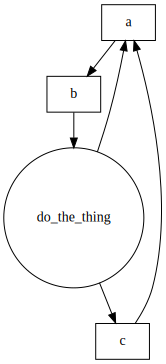

In [7]:
g = TestGraph()
g.next()
g.next(False)
g.next(False)
next(g)
next(g)
next(g)
next(g)
g.construct_graphvis()

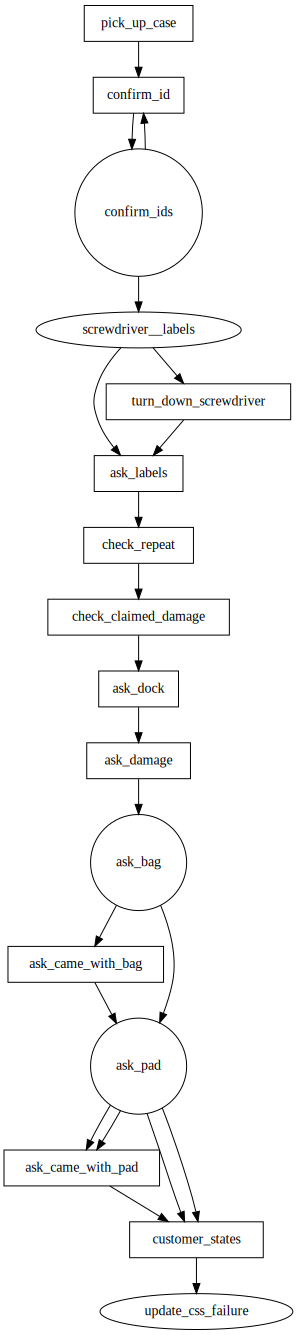

In [8]:
from step_algorithm_v2 import StepsController
StepsController().construct_graphvis(True)